# Import Libraries

In [2]:
import pandas as pd
import helper

In [2]:
df = pd.read_csv("df.csv")

In [3]:
df

,datetime,tickersymbol,price,quantity
0,2021-01-15 10:29:55.249470,VN30F2101,1193.8,NaN
1,2021-01-15 10:30:01.751771,VN30F2101,1194.0,NaN
2,2021-01-15 10:30:07.267981,VN30F2101,1193.8,NaN
3,2021-01-15 10:30:18.646696,VN30F2101,1193.9,NaN
4,2021-01-15 10:30:19.898463,VN30F2101,1193.8,NaN
...,...,...,...,...
2147850,2023-12-20 14:44:49.171591,VN30F2312,1096.1,NaN
2147851,2023-12-20 14:44:54.247655,VN30F2312,1096.2,NaN
2147852,2023-12-20 14:44:55.282236,VN30F2312,1096.0,NaN
2147853,2023-12-20 14:44:57.304817,VN30F2312,1096.1,NaN


In [4]:
# Ensure datetime is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Set datetime as index
df.set_index('datetime', inplace=True)

# Resample to 1-minute intervals
# You can customize what you want to aggregate for each column
df = df.resample('1T').agg({
    'tickersymbol': 'first',  # or maybe mode or last
    'price': 'last',          # closing price of the minute
    'quantity': 'sum'         # total volume in the minute
}).dropna(subset=['price'])   # optional: drop minutes without price

# Reset index if you want datetime back as a column
df = df.reset_index()


C:\Users\ACER\AppData\Local\Temp\ipykernel_27040\3437765473.py:9: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.resample('1T').agg({


In [5]:
df_train_in_sample = helper.compute_indicators(df, [2021, 2022], save_path="in_sample.csv")
df_train_out_sample = helper.compute_indicators(df, [2023], save_path="out_sample.csv")

File 'in_sample.csv' already exists.
File 'out_sample.csv' already exists.


In [6]:
df_train_in_sample

,tickersymbol,price,quantity,SMA50,SMA20,STD20,UpperBB,LowerBB,Resistance,Support,AvgVolume20
datetime,,,,,,,,,,,
2021-01-15 10:29:00,VN30F2101,1193.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-15 10:30:00,VN30F2101,1197.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-15 10:31:00,VN30F2101,1194.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-15 10:32:00,VN30F2101,1194.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-15 10:33:00,VN30F2102,1193.7,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 14:41:00,VN30F2301,1000.2,0.0,1005.032,1002.635,2.548947,1007.732894,997.537106,1008.9,998.9,1034258.30
2022-12-30 14:42:00,VN30F2301,1000.2,0.0,1004.888,1002.345,2.474815,1007.294630,997.395370,1008.9,998.9,924760.10
2022-12-30 14:43:00,VN30F2301,1000.2,0.0,1004.734,1002.070,2.386387,1006.842774,997.297226,1008.9,998.9,777874.50


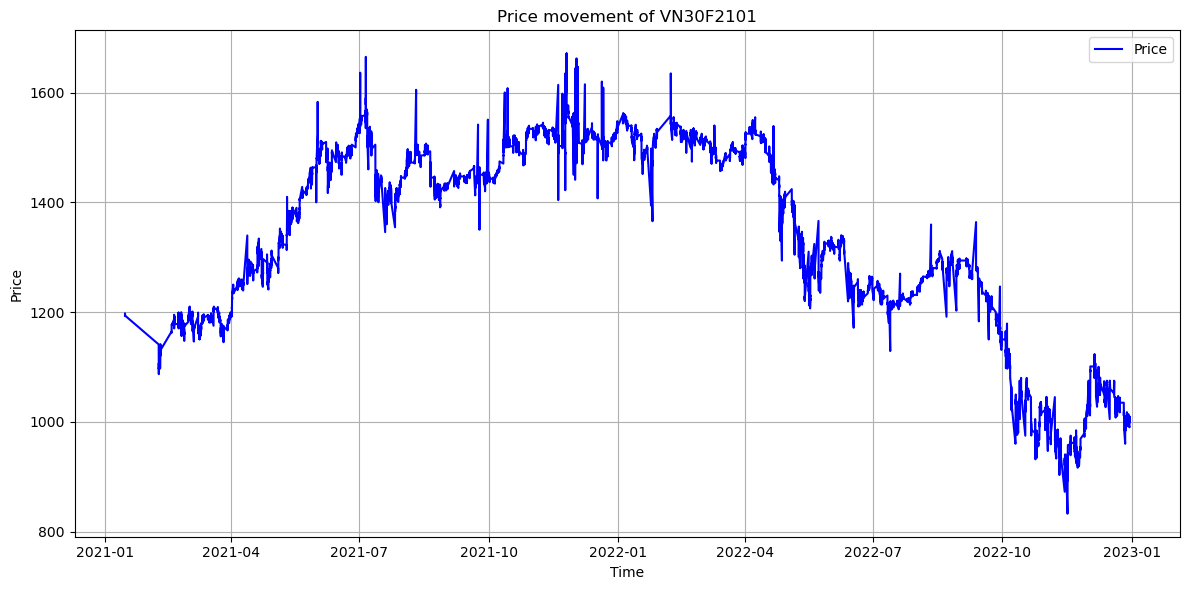

In [7]:
helper.plot_dataset(df_train_in_sample)

In [8]:
df_train_out_sample

,tickersymbol,price,quantity,SMA50,SMA20,STD20,UpperBB,LowerBB,Resistance,Support,AvgVolume20
datetime,,,,,,,,,,,
2023-01-03 08:45:00,VN30F2301,939.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:46:00,VN30F2301,941.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:47:00,VN30F2301,989.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:48:00,VN30F2301,993.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-03 08:49:00,VN30F2301,995.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-20 14:39:00,VN30F2312,1095.0,0.0,1094.376,1095.170,0.563915,1096.297830,1094.042170,1096.7,1093.8,924967.60
2023-12-20 14:42:00,VN30F2312,1095.4,0.0,1094.418,1095.130,0.513092,1096.156184,1094.103816,1096.7,1093.8,858359.90
2023-12-20 14:43:00,VN30F2312,1095.5,0.0,1094.460,1095.110,0.488715,1096.087429,1094.132571,1096.7,1094.3,743971.60


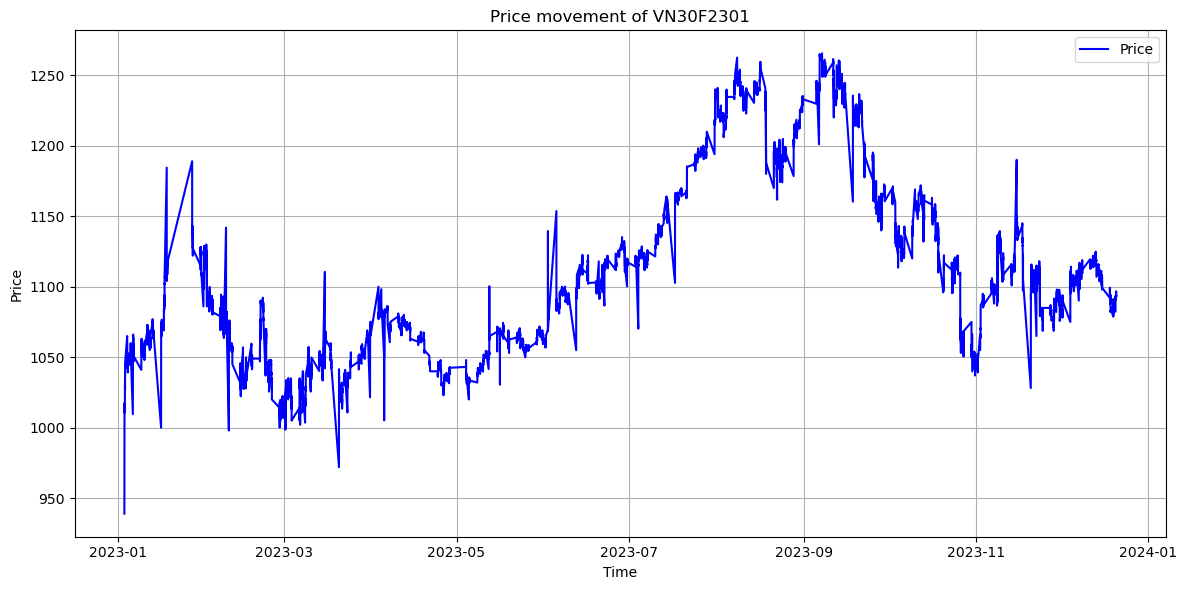

In [9]:
helper.plot_dataset(df_train_out_sample)

In [3]:
helper.base_param_reset()